# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: Vianny D'Souza 1001770237

Second Student Name and ID: Alay Parikh 1001774636



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]

In [82]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB

In [83]:
#Loading dataset from cardio_train
cardio_data = pd.read_csv('cardio_train.csv',sep=';')

In [84]:
#loading first five and last five records
print(cardio_data.head(5))
print(cardio_data.tail(5))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0

In [89]:
#printing class labels
print(cardio_data['cardio'].unique())

[0 1]


In [90]:
#splitting your dataset into train and test
#first import requires libraries
from sklearn.model_selection import train_test_split

X = cardio_data.drop(['cardio', 'id'], axis = 1)
Y = cardio_data['cardio']

#then split
X_Train,X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

In [91]:
#printing the test and train data
print(X_Train,y_Train)
print(X_Test, y_Test)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
48995  18159       1     164    85.0    140     90            3     1      0   
48996  19934       1     165    65.0    100     60            1     1      0   
48997  21777       1     160    78.0    120     80            1     1      0   
48998  23522       1     164    80.0    140     80            2     2      0   
48999  21028       1     155    77.0    160     80            2     1      0   

       alco  active  
0         0      

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


In [107]:
#Using Gini
clf_gini = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', min_samples_leaf = 5, max_depth = 1)

#Using training data
c = clf_gini.fit(X_Train, y_Train)
y_predict = c.predict(X_Test)

print("Accuracy:", accuracy_score(y_Test, y_predict), '\n')
print("Classification report:", classification_report(y_Test, y_predict))

Accuracy: 0.5614761904761905 

Classification report:               precision    recall  f1-score   support

           0       0.53      0.94      0.68     10487
           1       0.76      0.18      0.29     10513

    accuracy                           0.56     21000
   macro avg       0.65      0.56      0.49     21000
weighted avg       0.65      0.56      0.49     21000



In [108]:
#Now working for entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, min_samples_leaf = 5, max_depth = 5)

#Using training data
c = clf_entropy.fit(X_Train, y_Train)
y_predict = c.predict(X_Test)

#We print the accuracy and classification report
print("Accuracy:", accuracy_score(y_Test, y_predict), '\n')
print("Classification report:", classification_report(y_Test, y_predict))

Accuracy: 0.7322857142857143 

Classification report:               precision    recall  f1-score   support

           0       0.71      0.79      0.75     10487
           1       0.76      0.68      0.72     10513

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [109]:
#Now we print the confusion matrix
#Predicted values vs true values
pd.DataFrame(
    confusion_matrix(y_Test, y_predict),
    columns = ['Predicted Not Cardio', 'Predicted Cardio'],
    index = ['True Not Cardio', 'True Cardio']
)

,Predicted Not Cardio,Predicted Cardio
Not Cardio,8238,2249
True Cardio,3373,7140


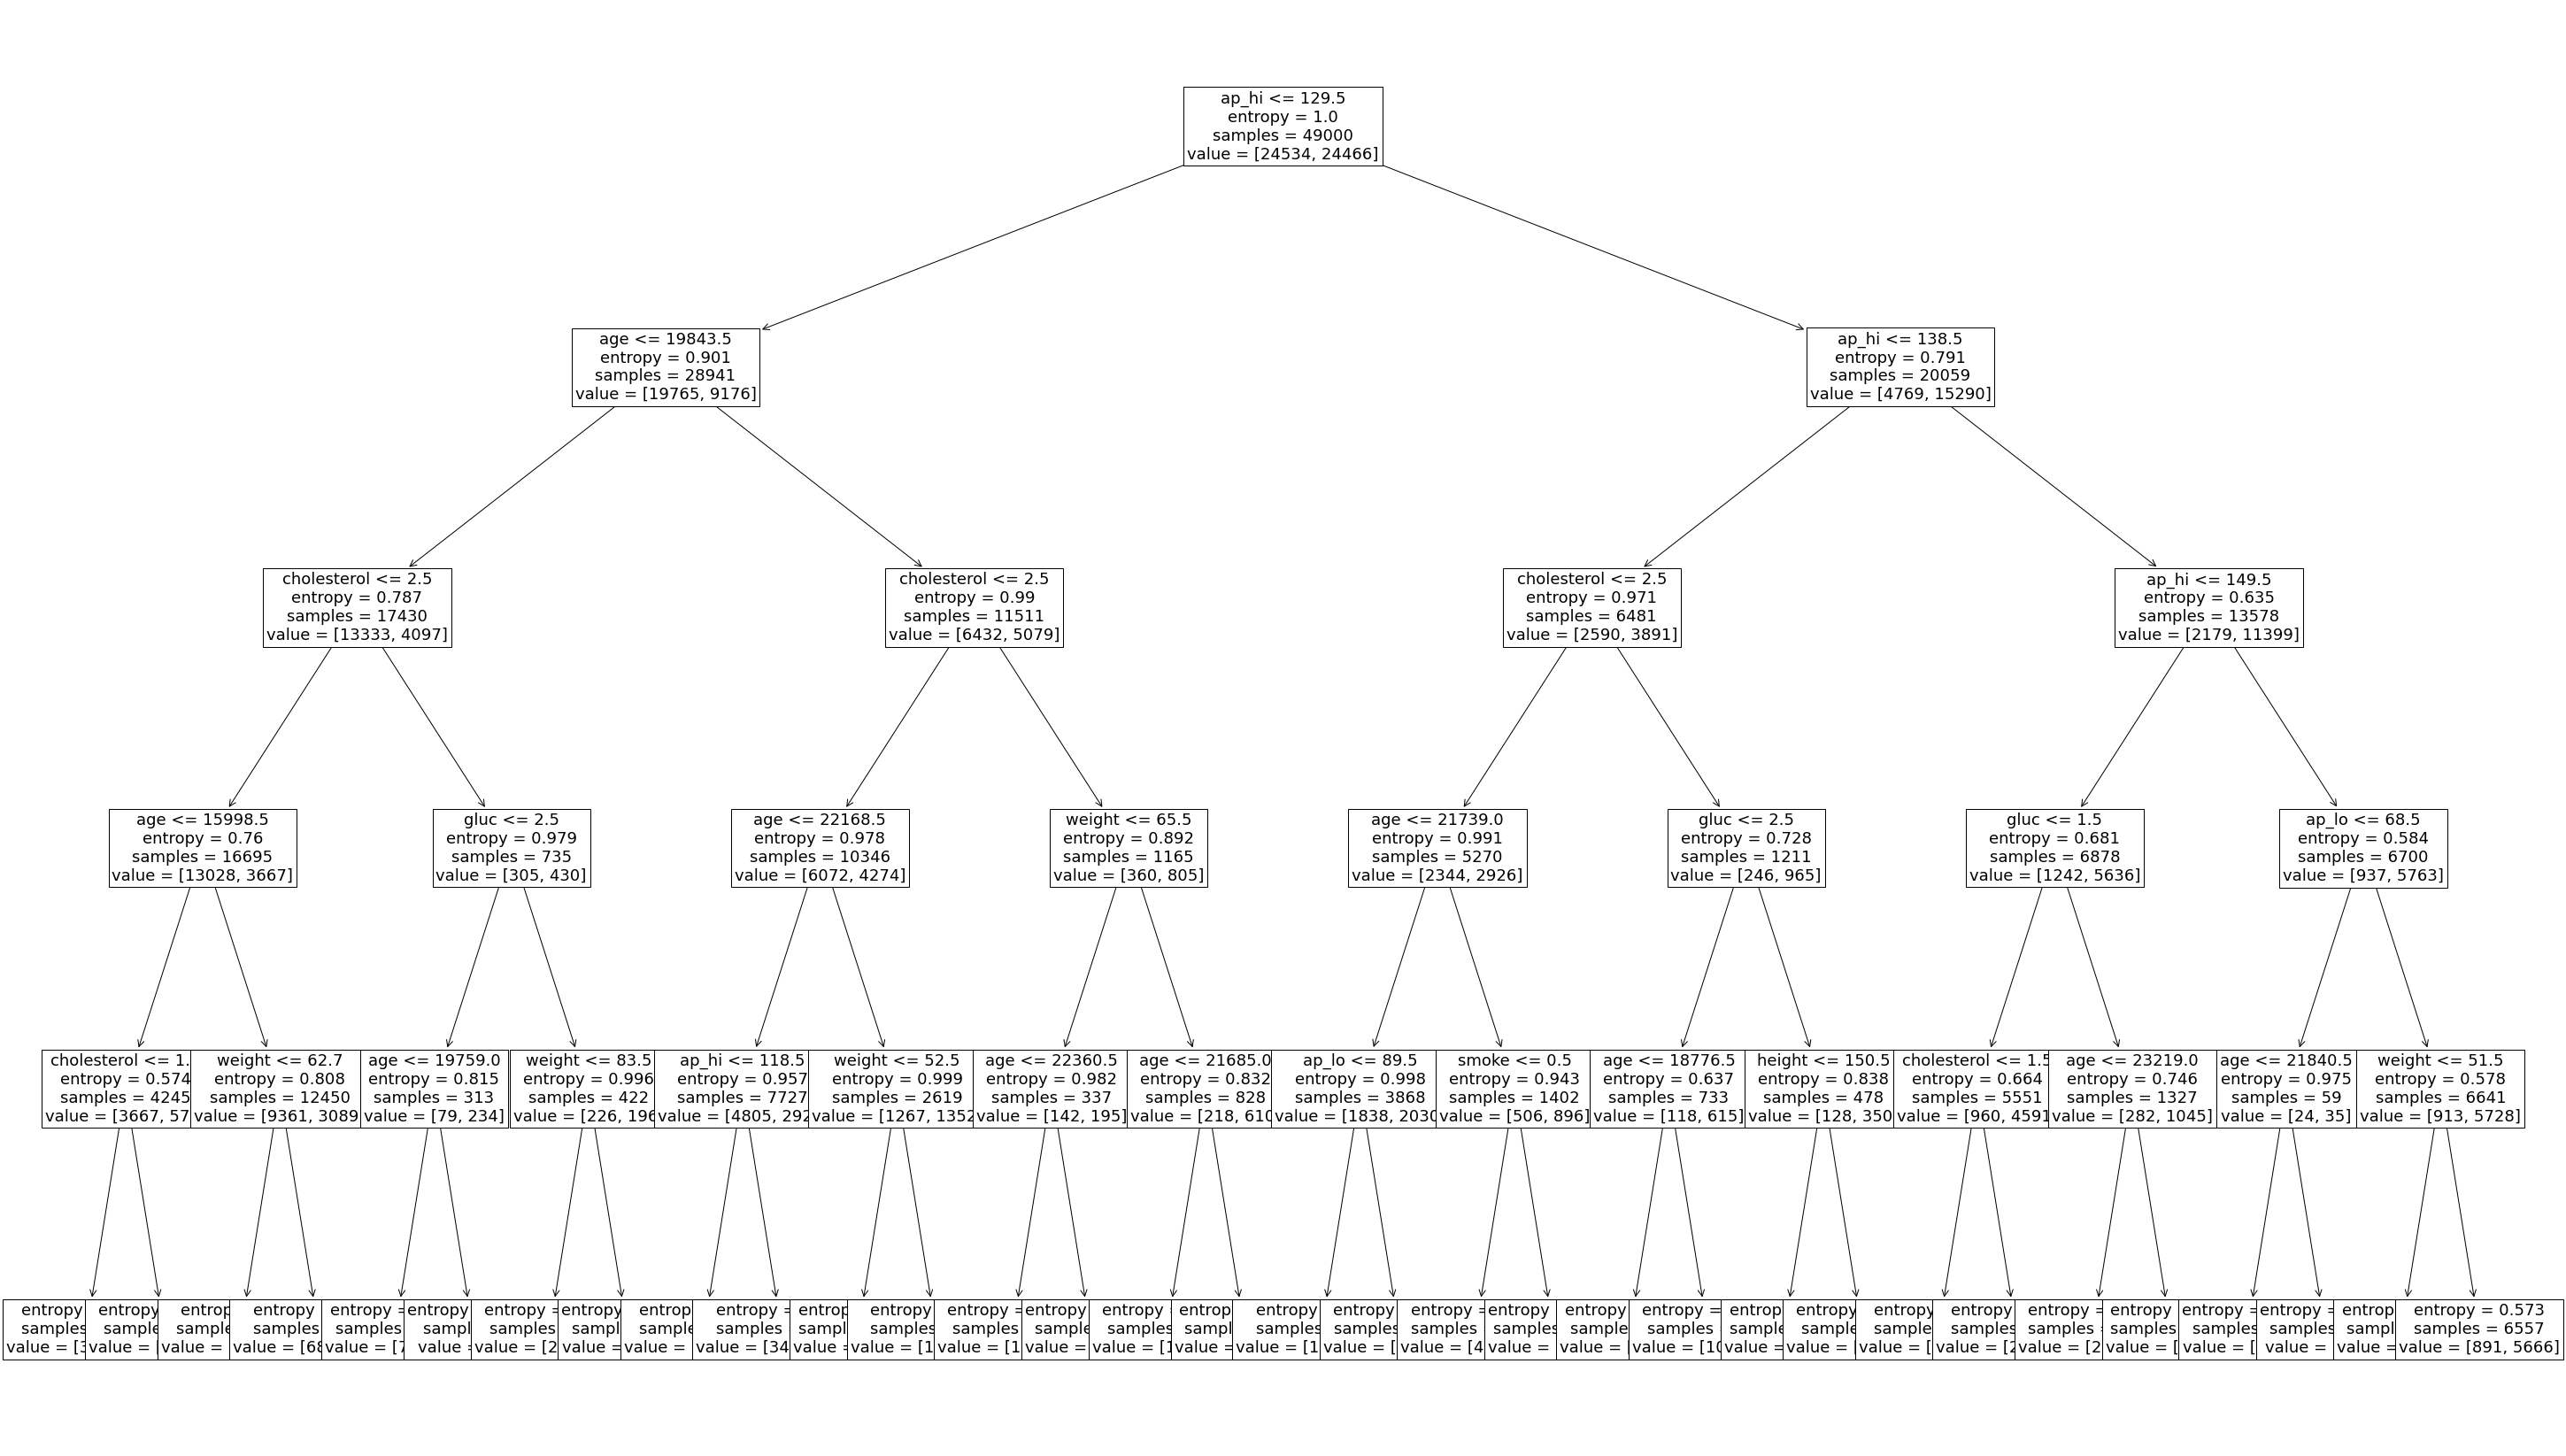

In [110]:
#Here, we are plotting the entropy in a graph
fig, ax = plt.subplots(figsize=(50,30))
tree.plot_tree(clf_entropy, fontsize=18, feature_names = list(cardio_data.columns[1:12]))
plt.show()

# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

In [115]:
#Using Naives Bayes classifier 
gnb = GaussianNB()

#training the model using training data
gnb.fit(X_Train, y_Train)

#Now predict using test data
y_Predict = gnb.predict(X_Test)

#Printing accuracy
print("Accuracy:",metrics.accuracy_score(y_Test, y_Predict))

Accuracy: 0.5895238095238096


In [116]:
#Now, Printing classification report
print("Classification report:", classification_report(y_Test, y_Predict))

Classification report:               precision    recall  f1-score   support

           0       0.56      0.90      0.69     10487
           1       0.73      0.28      0.41     10513

    accuracy                           0.59     21000
   macro avg       0.64      0.59      0.55     21000
weighted avg       0.64      0.59      0.55     21000



In [117]:
#Finally, we draw the confusion matrix
pd.DataFrame(
    confusion_matrix(y_Test, y_Predict),
    columns = ['Predicted Not Cardio', 'Predicted Cardio'],
    index = ['True Not Cardio', 'True Cardio']
)

,Predicted Not Cardio,Predicted Cardio
True Not Cardio,9404,1083
True Cardio,7537,2976


## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

<h3>We have made our report in a Word file, have mentioned our citations there</h3>